## This is a test Notebook. Testing out different kinds of EDA and finding out the problems. 

In [3]:
# Import necessary libraries

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import os

### All the following analysis is between authors, thus combined text from both authors is being considered. After this testing, separate chapters and books will be considered comparitively within and between authors

In [4]:
# Combine all Chapters to one list of all words for the MB series

mb_dir = '../2_Text_Preprocessing/TMBD_Chapters_lemma'

mb_book_text = []

for filename in os.listdir(mb_dir):
    filepath =  os.path.join(mb_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        for word in chapter_text.split():
            mb_book_text.append(word)

In [5]:
# Combine all Chapters to one list of all words for the IR series

ir_dir = '../2_Text_Preprocessing/IR_Chapters_lemma'

ir_book_text = []

for filename in os.listdir(ir_dir):
    filepath =  os.path.join(ir_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        for word in chapter_text.split():
            ir_book_text.append(word)

<Axes: xlabel='Samples', ylabel='Counts'>

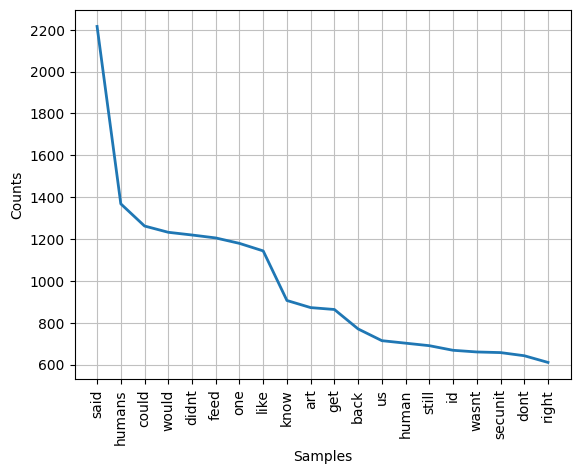

In [6]:
# Word Frequencies for all MB books

mb_word_freq = nltk.FreqDist(mb_book_text)
mb_word_freq.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

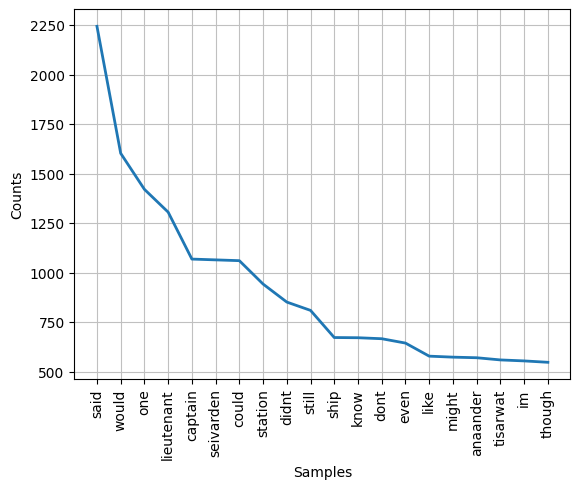

In [7]:
# Word Frequencies for IR books

ir_word_freq = nltk.FreqDist(ir_book_text)
ir_word_freq.plot(20)

In [8]:
# n-gram analysis

from nltk import ngrams

<Axes: xlabel='Samples', ylabel='Counts'>

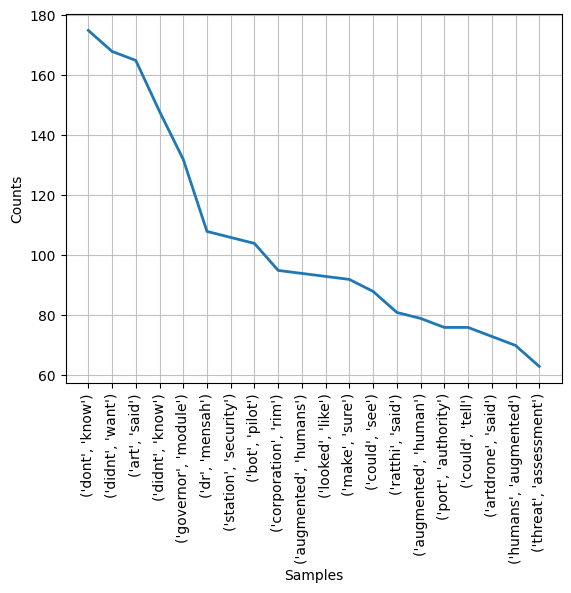

In [9]:
# Bigrams from the MB series

mb_bigrams = nltk.FreqDist(list(ngrams(mb_book_text, 2)))
mb_bigrams.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

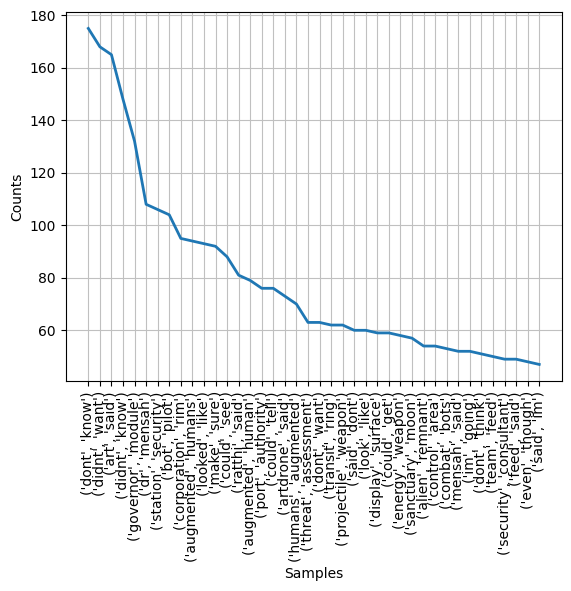

In [10]:
mb_bigrams.plot(40)

<Axes: xlabel='Samples', ylabel='Counts'>

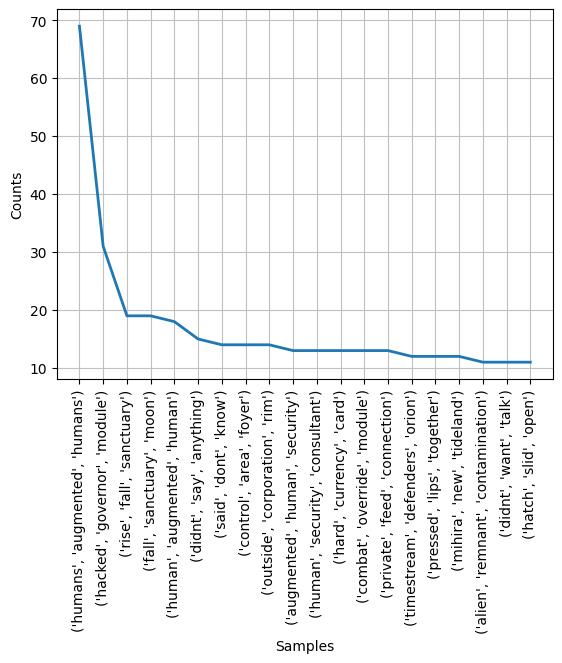

In [11]:
# Trigrams from the MB series

mb_trigrams = nltk.FreqDist(list(ngrams(mb_book_text, 3)))
mb_trigrams.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

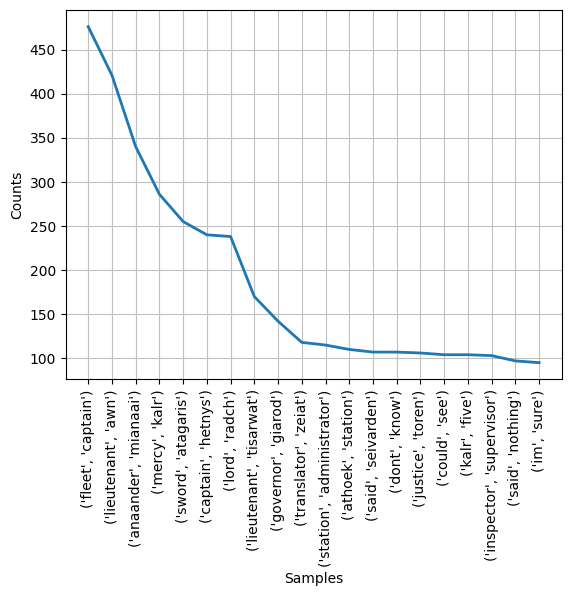

In [12]:
# Bigrams from the IR series

ir_bigrams = nltk.FreqDist(list(ngrams(ir_book_text, 2)))
ir_bigrams.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

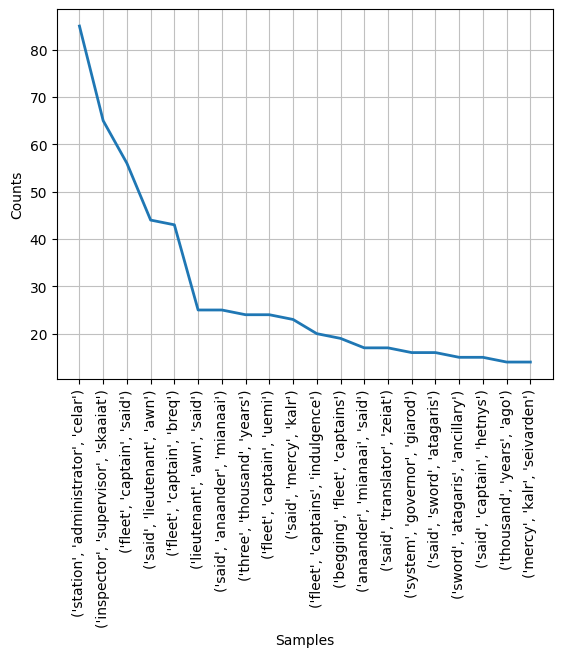

In [13]:
# Trigrams from the IR series

ir_trigrams = nltk.FreqDist(list(ngrams(ir_book_text, 3)))
ir_trigrams.plot(20)

<Axes: xlabel='Samples', ylabel='Counts'>

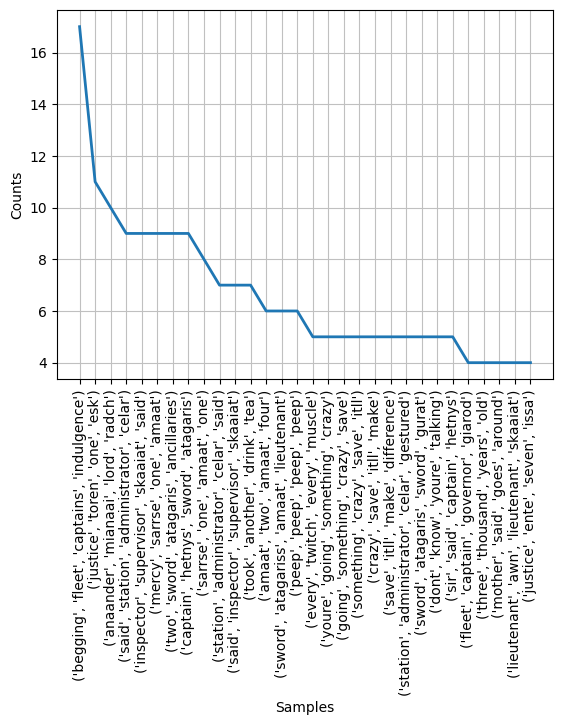

In [14]:
# IR 4-grams

ir_4_grams = nltk.FreqDist(list(ngrams(ir_book_text, 4)))
ir_4_grams.plot(30)

In [15]:
len(ir_4_grams)

155079

Now for vocabulary diversity, we need to consider the whole text and not just the text after the removal of stop words. 

In [16]:
# Combine all Chapters to one list of all words for the MB series (including stop words)

mb_sent_dir = '../2_Text_Preprocessing/TMBD_Chapters_sent_lemma'

mb_full_word_text = []

for filename in os.listdir(mb_sent_dir):
    filepath =  os.path.join(mb_sent_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        for word in chapter_text.split():
            mb_full_word_text.append(word)


mb_full_sent_text = []

for filename in os.listdir(mb_sent_dir):
    filepath =  os.path.join(mb_sent_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        for sent in chapter_text.split('.'):
            mb_full_sent_text.append(sent)

In [17]:
# Combine all Chapters to one list of all words for the IR series (including stop words)

ir_sent_dir = '../2_Text_Preprocessing/IR_Chapters_sent_lemma'

ir_full_word_text = []

for filename in os.listdir(ir_sent_dir):
    filepath =  os.path.join(ir_sent_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        for word in chapter_text.split():
            ir_full_word_text.append(word)


ir_full_sent_text = []

for filename in os.listdir(ir_sent_dir):
    filepath =  os.path.join(ir_sent_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        for sent in chapter_text.split('.'):
            ir_full_sent_text.append(sent)

In [18]:
mb_full_word_freq = nltk.FreqDist(mb_full_word_text)

ir_full_word_freq = nltk.FreqDist(ir_full_word_text)

In [19]:
# Vocabulary Diversity without removing stop words

mb_unique_word_count = len(mb_full_word_freq)
mb_total_word_count = len(mb_full_word_text)

ir_unique_word_count = len(ir_full_word_freq)
ir_total_word_count = len(ir_full_word_text)

In [20]:
mb_vocab_div = mb_unique_word_count / mb_total_word_count

ir_vocab_div = ir_unique_word_count / ir_total_word_count

In [21]:
mb_vocab_div, ir_vocab_div

(0.04371785239553835, 0.05344356781161997)

In [22]:
# Vocabulary Diversity after removing stop words

mb_unique_word_count_filt = len(mb_word_freq)
mb_total_word_count_filt = len(mb_book_text)

ir_unique_word_count_filt = len(ir_word_freq)
ir_total_word_count_filt = len(ir_book_text)

In [23]:
mb_vocab_div_filt = mb_unique_word_count_filt / mb_total_word_count_filt

ir_vocab_div_filt = ir_unique_word_count_filt / ir_total_word_count_filt

In [24]:
mb_vocab_div_filt, ir_vocab_div_filt

(0.0657794828757543, 0.08074960250294917)

Seems like vocabulary diversity is slightly more in the IR series when you consider all words including stop words. The difference increases when you consider only non-stopword text. There could be a few reasons for this. More complex world, Introduction of more political terms, a more varied cast of characters etc. 

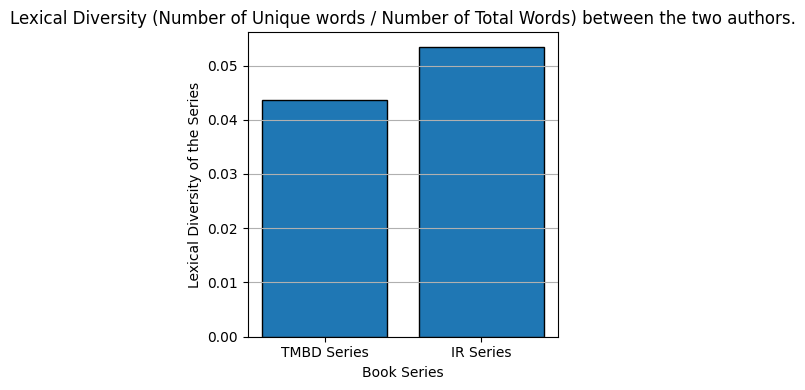

In [25]:
# Plot for all words, including stop words.

fig, ax = plt.subplots(figsize=(4, 4))

ax.bar(['TMBD Series', 'IR Series'], [mb_vocab_div, ir_vocab_div], edgecolor='black')

ax.set_title('Lexical Diversity (Number of Unique words / Number of Total Words) between the two authors.')
ax.set_xlabel('Book Series')
ax.set_ylabel('Lexical Diversity of the Series')

ax.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
# Sentence Length Distribution 

# considering mb_full_sent_text and ir_full_sent_text for this

len(mb_full_sent_text)

22824

In [27]:
len(ir_full_sent_text)

23563

since the number of chapters were comparable, the sentence count also seems comparable. 

In [28]:
mb_sent_lengths = [len(sent.split()) for sent in mb_full_sent_text]

ir_sent_lengths = [len(sent.split()) for sent in ir_full_sent_text]

In [29]:
import pandas as pd

In [30]:
mb_sent_len_series = pd.Series(mb_sent_lengths)

ir_sent_len_series = pd.Series(ir_sent_lengths)

In [31]:
mb_sent_len_series.mean(), ir_sent_len_series.mean()

(15.166929547844374, 12.915885074056783)

Longer sentences serieswise for MB series by an average of 2 words per sentence.

Now for chapter wise comparision within series, we need to order the chapter names

In [32]:
def chapter_order(filename):

    book_number = filename.split('_')[0]
    chapter_number = filename.split('_')[2].zfill(2)
    new_name = book_number + '.' + chapter_number
    
    return new_name

In [33]:
# Finding out average sentence length chapter wise.

mb_sent_dict = {}

for filename in os.listdir(mb_sent_dir):
    filepath =  os.path.join(mb_sent_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        mb_sent_dict[chapter_order(filename)] = 0
        for sent in chapter_text.split('.'):
            mb_sent_dict[chapter_order(filename)] += len(sent.split())
        mb_sent_dict[chapter_order(filename)] = mb_sent_dict[chapter_order(filename)] / len(chapter_text.split('.'))


ir_sent_dict = {}

for filename in os.listdir(ir_sent_dir):
    filepath =  os.path.join(ir_sent_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        ir_sent_dict[chapter_order(filename)] = 0
        for sent in chapter_text.split('.'):
            ir_sent_dict[chapter_order(filename)] += len(sent.split())
        ir_sent_dict[chapter_order(filename)] = ir_sent_dict[chapter_order(filename)] / len(chapter_text.split('.'))


In [34]:
len(mb_sent_dict), len(ir_sent_dict)

(71, 63)

In [35]:
mb_avg_sent_len_series = pd.Series(mb_sent_dict, index=mb_sent_dict.keys())

ir_avg_sent_len_series = pd.Series(ir_sent_dict, index=ir_sent_dict.keys())

So the following plots are faulty since the naming of the files is putting 12th chapter before 2nd chapter. Need to correct them. (but the most direct way is to rename all the files and that seems like a pain. find a better way?) (instead of renaming the files, defined a function for different index names)

<Axes: >

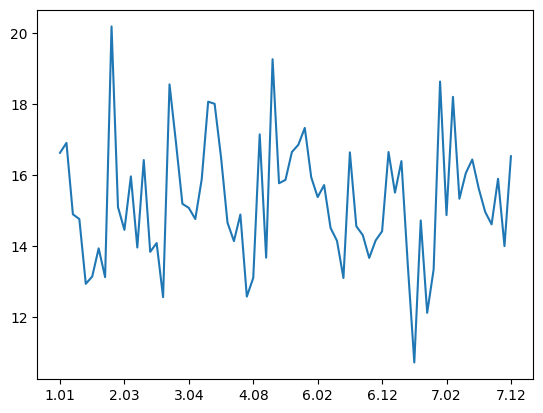

In [37]:
mb_avg_sent_len_series.sort_index().plot()

<Axes: >

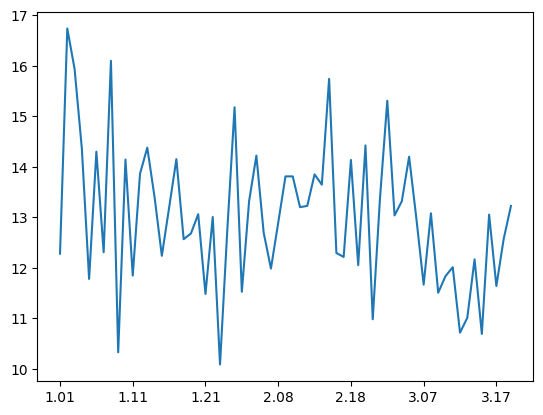

In [38]:
ir_avg_sent_len_series.sort_index().plot()

Can also calculate avg sentence number per chapter. The plots would have the same problem though. (solved)

Also POS tagging is left here. 

In [39]:
from nltk import word_tokenize

# POS tagging for MB series

mb_pos_tags = []

for sent in mb_full_sent_text:
    tokens = word_tokenize(sent)
    tagged = nltk.pos_tag(tokens)
    for tag in tagged:
        mb_pos_tags.append(tag)

In [40]:
# POS tagging for IR series

ir_pos_tags = []

for sent in ir_full_sent_text:
    tokens = word_tokenize(sent)
    tagged = nltk.pos_tag(tokens)
    for tag in tagged:
        ir_pos_tags.append(tag)

In [41]:
len(mb_pos_tags), len(ir_pos_tags)

(346181, 304341)

In [42]:
len(mb_full_word_text), len(ir_full_word_text)

(346060, 304321)

So we have pos_tag for every word now. Though I can't figure out why the difference in length? And why is the difference greater for MB series than for IR series.

In [43]:
# Assuming that Noun are NN and all names would have that tag, lets try to extract all the nouns.
from collections import defaultdict


mb_noun_words = defaultdict(lambda: 0)

for word, tag in mb_pos_tags:
    if tag == 'NN':
        mb_noun_words[word] += 1

ir_noun_words = defaultdict(lambda: 0)

for word, tag in ir_pos_tags:
    if tag == 'NN':
        ir_noun_words[word] += 1

In [44]:
len(mb_noun_words), len(ir_noun_words)

(4590, 4970)

So now we have a list of all noun words and their frequency in the text.

In [45]:
mb_chars = ['murderbot', 'mensah', 'art', 'volescu', 'pinlee', 
            'ratthi', 'bharadwaj', 'gurathin', 'overse', 'arada', 'miki',
            'tarik', 'iris']

for char in mb_chars:
    print(char, mb_noun_words[char])

murderbot 44
mensah 421
art 670
volescu 33
pinlee 162
ratthi 473
bharadwaj 48
gurathin 134
overse 171
arada 202
miki 214
tarik 166
iris 235


So except for Bharadwaj and Volescu, who really aren't in the story much after book 1, Gurathin has the least mentions in mb's log. Even Miki and Tarik have more mentions than Gurathin.

I don't have a similar list for IR series from memory so can't do a similar list for characters in that series. 

### Let's do Word Cloud now

In [46]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [47]:
mb_book_text_joined = " ".join(mb_book_text)
mb_book_text_joined[:20]

'used stations hauler'

In [48]:
ir_book_text_joined = " ".join(ir_book_text)
ir_book_text_joined[:20]

'8 citizen fosyf denc'

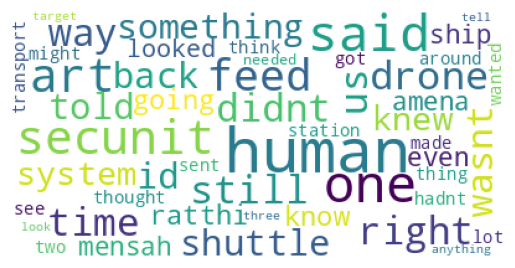

In [49]:
mb_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color='white').generate(mb_book_text_joined)

# display
plt.imshow(mb_wordcloud)
plt.axis('off')
plt.show()

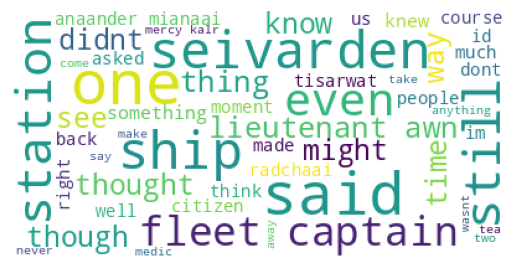

In [50]:
ir_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color='white').generate(ir_book_text_joined)

# display
plt.imshow(ir_wordcloud)
plt.axis('off')
plt.show()

So, it looks pretty. But other than that why do wordclouds?